<a href="https://colab.research.google.com/github/Sapch/MNIST/blob/master/MNISTModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


I deicided to add a hidden layer to the NN model with 620 nodes to improve the model (found 620 nodes to produce accurate model).
I used "softmax" activation function and compred the result with "sigmoid" function, based on the result sigmoid was producing a model with higher accuracy!
By doing some research about which optimizer performs better, I found interesting research on https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2
then I tried these optimizers,among them "Adam" was able to produce the best accuracy for this project.
Then I played with number of iteration on the training data (epoches) and was able to produce a model with high accuracy, 99%+ on training data and 98%+ on test data.

In [22]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print("--Get data--")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("--Process data--")
x_train, x_test = x_train / 255.0, x_test / 255.0

print("--Make model--")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #flatten 2D array to 1d array of 784 elements
  tf.keras.layers.Dense(620, activation= 'relu'), #A hidden layer is added to NN with 620 dots
  tf.keras.layers.Dense(10, activation='sigmoid') 
])
# I found "Adam" alg. to produce best result among Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, RMSprop & SGD alg.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("--Fit model--")
model.fit(x_train, y_train, epochs= 10, verbose=2)# I found 10 iteration to be enough to get to requested accuracy

print("--Evaluate model--")
model_loss, model_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Model Loss:    {model_loss:.2f}")
print(f"Model Accuray: {model_acc*100:.1f}%")

--Get data--
--Process data--
--Make model--
--Fit model--
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 - 10s - loss: 0.2140 - acc: 0.9376
Epoch 2/10
60000/60000 - 9s - loss: 0.0862 - acc: 0.9738
Epoch 3/10
60000/60000 - 9s - loss: 0.0557 - acc: 0.9827
Epoch 4/10
60000/60000 - 9s - loss: 0.0404 - acc: 0.9869
Epoch 5/10
60000/60000 - 9s - loss: 0.0290 - acc: 0.9907
Epoch 6/10
60000/60000 - 9s - loss: 0.0221 - acc: 0.9933
Epoch 7/10
60000/60000 - 9s - loss: 0.0186 - acc: 0.9938
Epoch 8/10
60000/60000 - 9s - loss: 0.0148 - acc: 0.9950
Epoch 9/10
60000/60000 - 9s - loss: 0.0133 - acc: 0.9956
Epoch 10/10
60000/60000 - 9s - loss: 0.0108 - acc: 0.9963
--Evaluate model--
10000/10000 - 1s - loss: 0.0679 - acc: 0.9838
Model Loss:    0.07
Model Accuray: 98.4%


Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, Optimizer, RMSprop, SGD

In [0]:
#Save Model to MNIST.
model.save('MNIST.h5')

In [0]:
from google.colab import files
files.download('MNIST.h5')

I am gonna plot the images to be able to see the actual picture vs the model prediction (human readable)

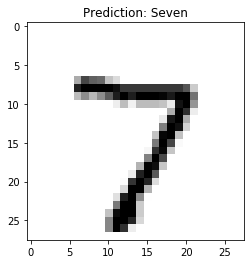

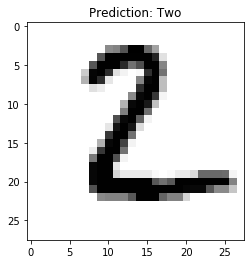

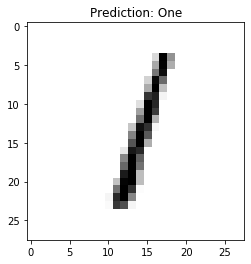

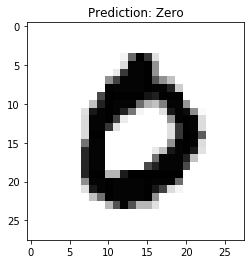

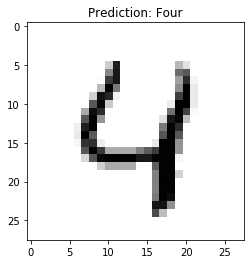

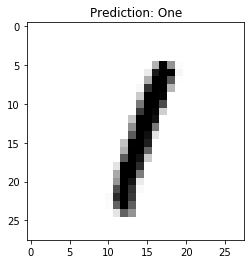

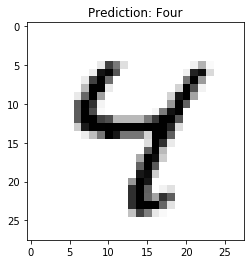

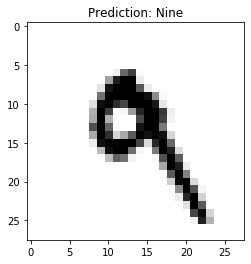

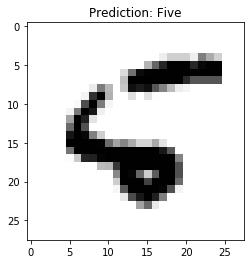

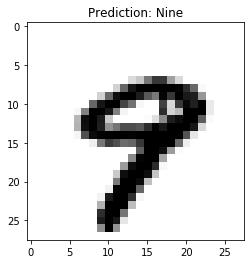

In [12]:
class_names =['Zero', 'One', 'Two', 'Three', 'Four',
              'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

prediction = model.predict(x_test)

for i in range(10):
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  #plt.xlabel("Actual number: " + class_names[y_test[i]])
  plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
  plt.show()
